<a href="https://colab.research.google.com/github/rafaelbragae/Inteligencia_Artificial/blob/main/Trabalho_final_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dtypes = { 'Group': 'category', 'M/F': 'category'}

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_trabalho_final/alzheimer.csv', dtype=dtypes)

Attributes:
It consists of 10 attributes which are describes as follows :

- Group  - It is a group of Converted (Previously Normal but developed dimentia later), Demented and Nondemented (Normal Pateints)

**Demographics Info**

- M.F - Gender
- Age - Age in years
- EDUC - Years of education
- SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)

**Clinical Info**

- MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)
- CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)

**Derived anatomic volumes**

- eTIV - Estimated total intracranial volume, mm3
- nWBV - Normalized whole-brain volume
- ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target

In [ ]:
#Imprimindo as informações dos primeiros pacientes
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


<hr></hr>

# **Análise dos dados**

<hr></hr>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Group   373 non-null    category
 1   M/F     373 non-null    category
 2   Age     373 non-null    int64   
 3   EDUC    373 non-null    int64   
 4   SES     354 non-null    float64 
 5   MMSE    371 non-null    float64 
 6   CDR     373 non-null    float64 
 7   eTIV    373 non-null    int64   
 8   nWBV    373 non-null    float64 
 9   ASF     373 non-null    float64 
dtypes: category(2), float64(5), int64(3)
memory usage: 24.4 KB


In [ ]:
data.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


<hr></hr>

# ***Limpeza dos dados***

<hr></hr>

In [ ]:
# Verificando valores faltantes
data.isna().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [ ]:
# Verificando valores duplicados
data.duplicated().sum()

0

In [ ]:
# Retirando atributos desnecessários
data = data.drop(['CDR'], axis=1) # remove a coluna de CDR pois mostra qual o resultado do exame
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,1698,0.701,1.034


In [ ]:
# Podemos notar que há valores faltantes para SES e MMSE, e não há valores duplicados
# Com isso, devemos analisar as dados gerais desses dois atributos para poder preencher esses dados
print(data['SES'].describe())

def variacao(var):
    fig = plt.figure(figsize=(16,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(212)

    ax1=sns.distplot(data[[var]],hist=False)
    ax1.set_title('Distribution of '+ var)
    plt.show()


count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64


<ipython-input-10-2058baa59c32>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(data[[var]],hist=False)


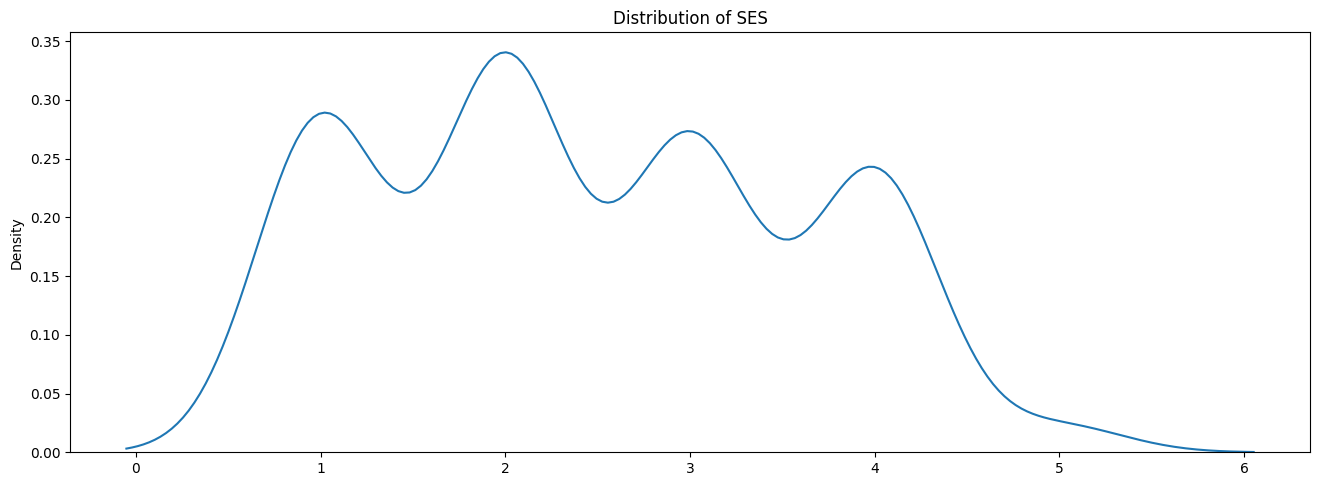

In [ ]:
variacao('SES')

Como podemos ver e sabemos pela definicação de cada atributo, o atributo SES recebe apenas números inteiros e está bem distribuido entre as classes. Logo, substituir pela média ou mediana seria uma boa escolha.

In [ ]:
# Substituindo informação faltante pela mediana
data['SES'].fillna((data['SES'].median()), inplace=True)

<ipython-input-10-2058baa59c32>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(data[[var]],hist=False)


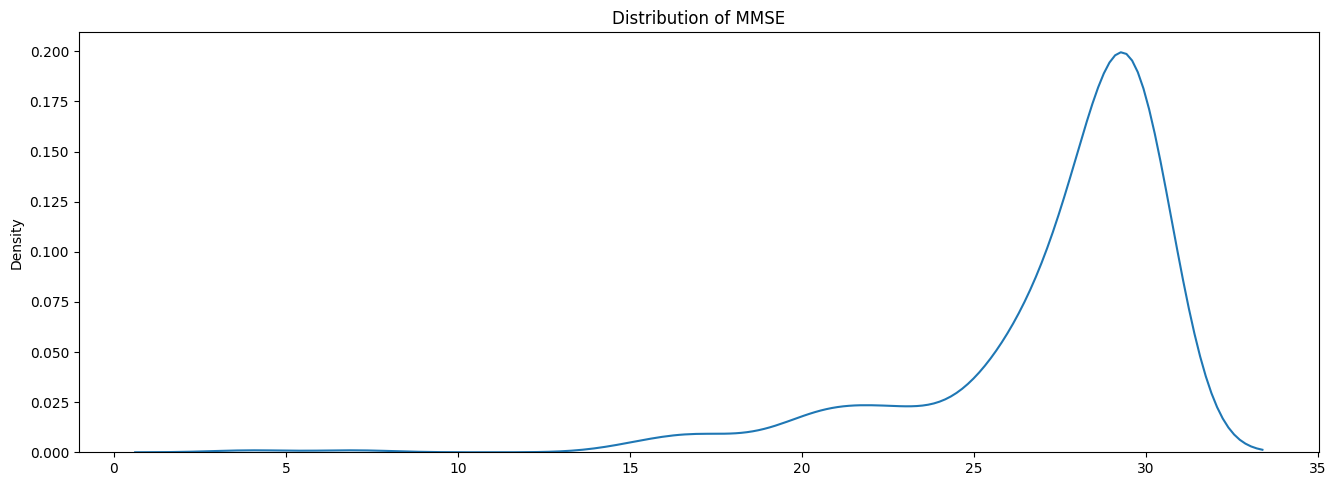

In [ ]:
data['MMSE'].describe()
variacao('MMSE')

Já o atributo MMSE, não está bem distribuido entre as classes, se concentrando nos valores entre 25 e 31, e só recebe números inteiros também. Então podemos substituir pela média ou mediana também.

In [ ]:
# Substituindo informação faltante pela média
data['MMSE'].fillna((data['MMSE'].mean()), inplace=True)

In [ ]:
data.isna().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [ ]:
# Total de linhas e colunas
print("Total de linhas e colunas (Rows,Columns) : ",data.shape)

Total de linhas e colunas (Rows,Columns) :  (373, 9)


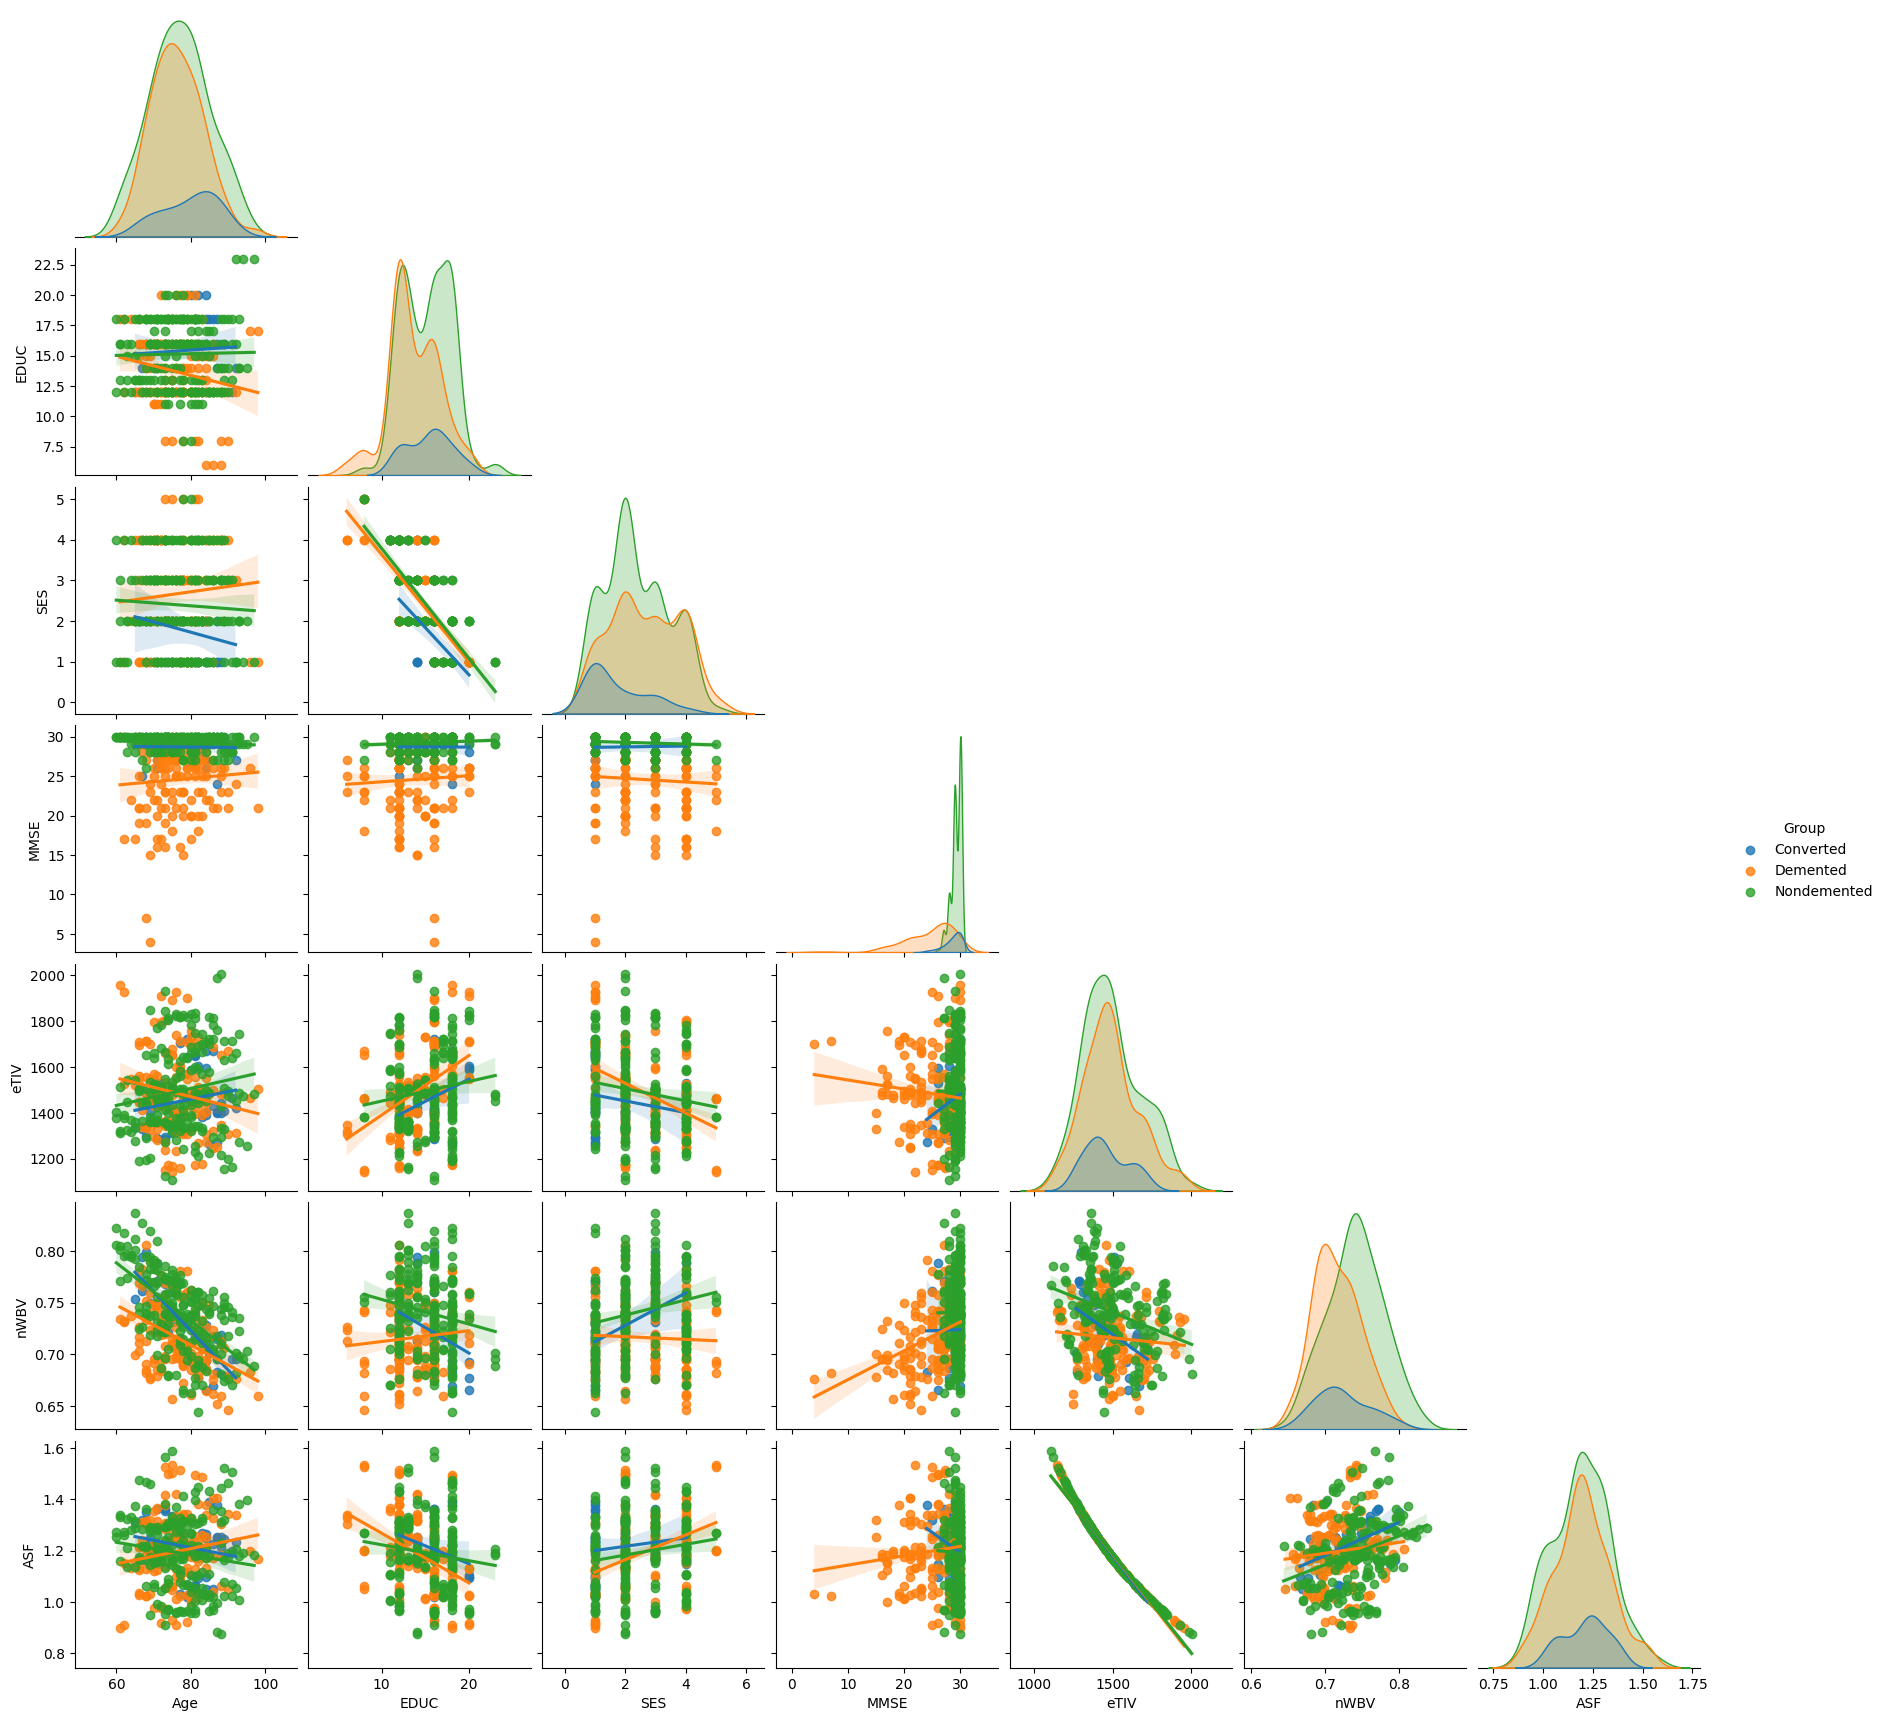

In [ ]:
#Plota gráficos de relacionamento entre os dados, no caso, há uma comparação entre as espécies e seus tamanhos
sns.pairplot(data, hue="Group", corner=True, kind='reg')

(0.7098039215686275, 0.9419607843137255, 0.5419607843137255)


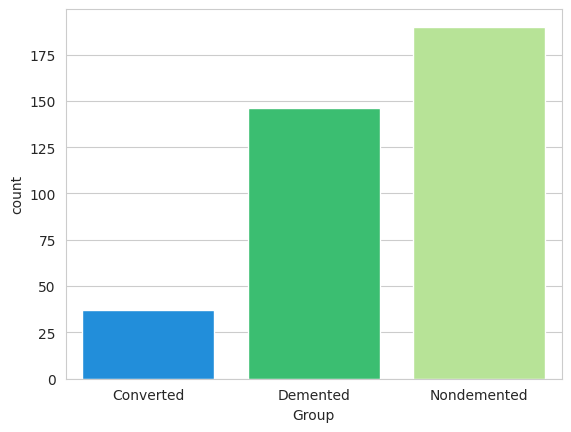

In [ ]:
# Histograma com as diferenças entre a quantidade de pacientes em cada grupo
sns.set_style("whitegrid")
palette=sns.color_palette("terrain")
sns.countplot(x='Group', data=data,palette=palette)
print(palette[2])

In [ ]:
# Tirando os dados dos pacientes diagnosticados com Converted, pois queremos predizer apenas se a pessoa tem ou não Alzheimer
data = data[data["Group"] != "Converted"]

In [ ]:
# Refazendo o index para não ficar "buracos" nos dados
data = data.reset_index(drop=True)

In [ ]:
# Como o que queremos como resultado é o diagnóstico dos pacientes, devemos usar táticas de classificação para esse conjunto de dados, para isso é necessário tornar numérico os atributos que sejam categóricos
print(data.Group.value_counts())
print(data.Group.unique())


Nondemented    190
Demented       146
Converted        0
Name: Group, dtype: int64
['Nondemented', 'Demented']
Categories (3, object): ['Converted', 'Demented', 'Nondemented']


In [ ]:
# Conversão (Group)
# 0 = Nondemented
# 1 = Demented
label = LabelEncoder()
label_group = label.fit_transform(data.Group)
print(label_group)
data['Group'] = label_group
data.head()

[1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1
 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 1 1 1]


,Group,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,1,M,87,14,2.0,27.0,1987,0.696,0.883
1,1,M,88,14,2.0,30.0,2004,0.681,0.876
2,0,M,75,12,2.0,23.0,1678,0.736,1.046
3,0,M,76,12,2.0,28.0,1738,0.713,1.010
4,0,M,80,12,2.0,22.0,1698,0.701,1.034


In [ ]:
data.shape

(336, 9)

In [ ]:
# Conversão (M/F)
# 0 = F
# 1 = M
label_sex = label.fit_transform(data['M/F'])
print(label_sex)
data['M/F'] = label_sex
data.head()

[1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1
 0 0 0]


,Group,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,1,1,87,14,2.0,27.0,1987,0.696,0.883
1,1,1,88,14,2.0,30.0,2004,0.681,0.876
2,0,1,75,12,2.0,23.0,1678,0.736,1.046
3,0,1,76,12,2.0,28.0,1738,0.713,1.010
4,0,1,80,12,2.0,22.0,1698,0.701,1.034


In [ ]:
correlation = data.corr()

<Axes: >

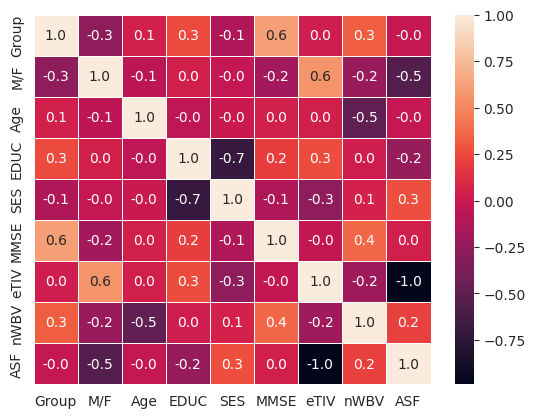

In [ ]:
# Plotando tabela de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

<hr></hr>

# ***Árvore de Decisão***

<hr></hr>

In [ ]:
y = data['Group']
x = data.drop('Group',axis=1)


In [ ]:
random_seed = 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=random_seed)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((252, 8), (84, 8), (252,), (84,))

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 10))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    cv=5
)

tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 5 folds for each of 2052 candidates, totalling 10260 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [ ]:
tree_cv.best_score_, tree_cv.best_params_

(0.8983059800037729,
 {'criterion': 'gini',
  'max_depth': 4,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'splitter': 'random'})

In [ ]:
results = pd.DataFrame(tree_cv.cv_results_)
acc_tree = list(results['mean_test_score'])

In [ ]:
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Test Result:
Accuracy Score: 79.76%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.756098   0.837209  0.797619   0.796653      0.800516
recall      0.815789   0.782609  0.797619   0.799199      0.797619
f1-score    0.784810   0.808989  0.797619   0.796899      0.798051
support    38.000000  46.000000  0.797619  84.000000     84.000000
_______________________________________________
Confusion Matrix: 
 [[31  7]
 [10 36]]



In [ ]:
pred_tree = tree_clf.predict(x_test)

<hr></hr>

# ***KNN***

<hr></hr>

In [ ]:
# importing sklearn StandardScaler class which is for Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(['Group'],axis = 1),),
        columns=['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'])

In [ ]:
y = data['Group']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=1/4, random_state=random_seed, stratify=y)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((252, 8), (252,), (84, 8), (84,))

In [ ]:
#Importando biblioteca de KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [ ]:
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, Y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'knn__n_neighbors': 1}, 0.8771764705882352)

In [ ]:
knn_grid.best_score_, knn_grid.best_params_

(0.8771764705882352, {'knn__n_neighbors': 1})

In [ ]:
results = pd.DataFrame(knn_grid.cv_results_)
acc_knn = list(results['mean_test_score'])

In [ ]:
knn_clf = KNeighborsClassifier(knn_grid.best_params_['knn__n_neighbors'])
knn_clf.fit(X_train, Y_train)
print_score(knn_clf, X_train, Y_train, X_test, Y_test, train=False)

Test Result:
Accuracy Score: 89.29%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.966667   0.851852  0.892857   0.909259      0.902425
recall      0.783784   0.978723  0.892857   0.881254      0.892857
f1-score    0.865672   0.910891  0.892857   0.888281      0.890973
support    37.000000  47.000000  0.892857  84.000000     84.000000
_______________________________________________
Confusion Matrix: 
 [[29  8]
 [ 1 46]]



In [ ]:
pred_knn = knn_clf.predict(X_test)

<hr></hr>

# ***SVM***

<hr></hr>

In [ ]:
# Melhorando os hiperparâmetros
params_grid = [{'kernel': ['rbf'], 'gamma': [
            1,
            0.1,
            0.01,
            0.001,
            0.0001,
        ], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels
encoder.fit(Y_train)
Y_train_svm = encoder.transform(Y_train)

# encoding test labels
encoder.fit(Y_test)
Y_test_svm = encoder.transform(Y_test)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)

Number of numeric features: 8


In [ ]:
Y_test_svm

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
X_test

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
238,-0.881917,-0.225070,-0.864283,0.442453,0.474551,-0.853256,0.450617,0.841517
240,-0.881917,-0.093551,0.516926,-1.381648,0.211570,-0.808731,0.853224,0.784660
303,1.133893,0.564045,0.516926,0.442453,0.737531,1.918456,0.370095,-1.688619
60,-0.881917,-0.882666,-0.518981,1.354504,0.737531,-0.725246,1.416874,0.685161
281,-0.881917,0.564045,1.207530,-1.381648,0.737531,-1.309643,0.235893,1.452730
...,...,...,...,...,...,...,...,...
19,-0.881917,0.169488,0.516926,-0.469598,0.474551,-0.881085,0.477457,0.869946
201,1.133893,1.221641,0.171623,0.442453,0.737531,0.037254,-1.320855,-0.160587
90,-0.881917,-1.014185,0.516926,0.442453,0.737531,-0.001706,1.712119,-0.117944
198,-0.881917,-0.093551,1.207530,-0.469598,0.737531,-0.625063,0.719021,0.564339


In [ ]:
# Importando a biblioteca do SVM
from sklearn.svm import SVC

In [ ]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, Y_train_svm)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
svm_model.best_score_, svm_model.best_params_

(0.8853333333333333, {'C': 10, 'gamma': 1, 'kernel': 'rbf'})

In [ ]:
results = pd.DataFrame(svm_model.cv_results_)
acc_svm = list(results['mean_test_score'])

In [ ]:
svm_clf = SVC(C=svm_model.best_params_['C'], gamma=svm_model.best_params_['gamma'], kernel=svm_model.best_params_['kernel'])
svm_clf.fit(X_train, Y_train_svm)
print_score(svm_clf, X_train, Y_train_svm, X_test, Y_test_svm, train=False)

Test Result:
Accuracy Score: 88.10%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.965517   0.836364  0.880952   0.900940      0.893253
recall      0.756757   0.978723  0.880952   0.867740      0.880952
f1-score    0.848485   0.901961  0.880952   0.875223      0.878406
support    37.000000  47.000000  0.880952  84.000000     84.000000
_______________________________________________
Confusion Matrix: 
 [[28  9]
 [ 1 46]]



In [ ]:
pred_svm = svm_clf.predict(X_test)

<hr></hr>

# ***Comparação dos modelos***

<hr></hr>

In [ ]:
# Dados fictícios de acurácia para diferentes modelos
acuracia = {'Árvore de Decisão': accuracy_score(y_test, pred_tree) * 100,
            'KNN': accuracy_score(Y_test, pred_knn) * 100,
            'SVM': accuracy_score(Y_test_svm, pred_svm) * 100}

# Criar um DataFrame para armazenar os resultados
df = pd.DataFrame.from_dict(acuracia, orient='index', columns=['Acurácia'])

# Classificar os modelos em ordem decrescente de acurácia
df = df.sort_values(by='Acurácia', ascending=False)

# Imprimir a tabela de resultados
print(df)

                    Acurácia
KNN                89.285714
SVM                88.095238
Árvore de Decisão  79.761905


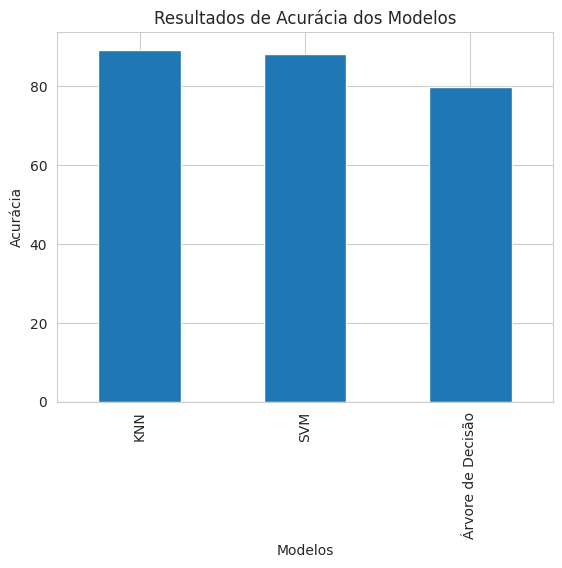

In [ ]:
# Dados de acurácia para diferentes modelos
acuracia = {'Árvore de Decisão': accuracy_score(y_test, pred_tree) * 100,
            'KNN': accuracy_score(Y_test, pred_knn) * 100,
            'SVM': accuracy_score(Y_test_svm, pred_svm) * 100}

# Criar um DataFrame para armazenar os resultados
df = pd.DataFrame.from_dict(acuracia, orient='index', columns=['Acurácia'])

# Classificar os modelos em ordem decrescente de acurácia
df = df.sort_values(by='Acurácia', ascending=False)

# Plotar o gráfico de barras
df.plot(kind='bar', legend=False)
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Resultados de Acurácia dos Modelos')
plt.show()

In [ ]:
# Teste de Diferença Estatística entre os modelos (ANOVA)
from scipy.stats import f_oneway

# Métricas de desempenho dos diferentes métodos
metodo1 = acc_tree
metodo2 = acc_knn
metodo3 = acc_svm

# Aplicando o teste ANOVA
stat, p_value = f_oneway(metodo1, metodo2, metodo3)

# Interpretação do resultado
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Há diferença significativa entre os métodos.")
else:
    print("Não há diferença significativa entre os métodos.")

Há diferença significativa entre os métodos.


<hr></hr>

# ***Regras de associação***

<hr></hr>

In [ ]:
dtypes = { 'Group': 'category', 'M/F': 'category'}

data_ra = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_trabalho_final/alzheimer.csv', dtype=dtypes)

In [ ]:
data_ra.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
# Retirando atributos desnecessários
data_ra = data_ra.drop(['Group'], axis=1) # remove a coluna de Groups para fazer as regras com os grupos mais específicos de CDR
data_ra.head()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
# Substituindo informação faltante pela média
data_ra['SES'].fillna((data_ra['SES'].median()), inplace=True)

In [ ]:
# Substituindo informação faltante pela média
data_ra['MMSE'].fillna((data_ra['MMSE'].mean()), inplace=True)

In [ ]:
data_ra.isna().sum()

M/F     0
Age     0
EDUC    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64

In [ ]:
data_ra.Age.value_counts()

73    26
75    22
78    21
80    20
81    18
71    18
82    17
76    16
77    16
68    14
84    13
69    13
83    12
70    12
74    12
72    11
79    11
66    10
88    10
86    10
85     9
89     7
65     6
67     6
87     6
90     5
62     4
91     4
61     4
92     4
64     3
93     3
63     3
60     2
95     1
94     1
97     1
96     1
98     1
Name: Age, dtype: int64

In [ ]:
bins = [59, 71, 77, 88, 99]
data_ra.Age = pd.cut(data_ra['Age'].to_numpy(), bins = bins, labels=['60-71 years', '71-78 years', '78-88 years', '88-98 years'])

In [ ]:
data_ra.EDUC.value_counts()

12    103
16     81
18     64
14     33
13     27
15     17
20     13
11     11
8       9
17      9
6       3
23      3
Name: EDUC, dtype: int64

In [ ]:
bins = [5, 12, 13, 16, 25]
data_ra.EDUC = pd.cut(data_ra['EDUC'].to_numpy(), bins = bins, labels=['6-12 EDUC', '12-13 EDUC', '13-16 EDUC', '16-24 EDUC'])

In [ ]:
bins = [0, 2, 3, 6]
data_ra.SES = pd.cut(data_ra['SES'].to_numpy(), bins = bins, labels=['0-2 SES', '2-3 SES', '3-5 SES'])

In [ ]:
data_ra.MMSE.value_counts()

30.000000    114
29.000000     91
28.000000     45
27.000000     32
26.000000     20
25.000000     12
21.000000     11
23.000000     11
22.000000      7
20.000000      7
17.000000      5
24.000000      4
16.000000      3
19.000000      3
15.000000      2
18.000000      2
27.342318      2
7.000000       1
4.000000       1
Name: MMSE, dtype: int64

In [ ]:
bins = [3, 27, 29, 31]
data_ra.MMSE = pd.cut(data_ra['MMSE'].to_numpy(), bins = bins, labels=['4-27 MMSE', '27-29 MMSE', '29-30 MMSE'])

In [ ]:
data_ra.CDR.value_counts()

0.0    206
0.5    123
1.0     41
2.0      3
Name: CDR, dtype: int64

In [ ]:
bins = [-0.1, 0.4, 0.9, 1.4, 2.1]
data_ra.CDR = pd.cut(data_ra['CDR'].to_numpy(), bins = bins, labels=['Nondemented', 'Very_mild_demented', 'Mild_demented', 'Moderate_demented'])

In [ ]:
bins = [1104, 1357, 1470, 1597, 2005]
data_ra.eTIV = pd.cut(data_ra['eTIV'].to_numpy(), bins = bins, labels=['1105-1357 eTIV', '1357-1470 eTIV', '1470-1597 eTIV', '1597-2004 eTIV'])

In [ ]:
bins = [0.642, 0.729, 0.756, 0.838]
data_ra.nWBV = pd.cut(data_ra['nWBV'].to_numpy(), bins = bins, labels=['0.644-0.729 nWBV', '0.729-0.756 nWBV', '0.756-0.837 nWBV'])

In [ ]:
bins = [0.874, 1.194, 1.293, 1.588]
data_ra.ASF = pd.cut(data_ra['ASF'].to_numpy(), bins = bins, labels=['0.876-1.194 ASF', '1.194-1.293 ASF', '1.293-1.587 ASF'])

In [ ]:
data_ra

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,M,78-88 years,13-16 EDUC,0-2 SES,4-27 MMSE,Nondemented,1597-2004 eTIV,0.644-0.729 nWBV,0.876-1.194 ASF
1,M,78-88 years,13-16 EDUC,0-2 SES,29-30 MMSE,Nondemented,1597-2004 eTIV,0.644-0.729 nWBV,0.876-1.194 ASF
2,M,71-78 years,6-12 EDUC,0-2 SES,4-27 MMSE,Very_mild_demented,1597-2004 eTIV,0.729-0.756 nWBV,0.876-1.194 ASF
3,M,71-78 years,6-12 EDUC,0-2 SES,27-29 MMSE,Very_mild_demented,1597-2004 eTIV,0.644-0.729 nWBV,0.876-1.194 ASF
4,M,78-88 years,6-12 EDUC,0-2 SES,4-27 MMSE,Very_mild_demented,1597-2004 eTIV,0.644-0.729 nWBV,0.876-1.194 ASF
...,...,...,...,...,...,...,...,...,...
368,M,78-88 years,13-16 EDUC,0-2 SES,27-29 MMSE,Very_mild_demented,1597-2004 eTIV,0.644-0.729 nWBV,0.876-1.194 ASF
369,M,78-88 years,13-16 EDUC,0-2 SES,4-27 MMSE,Very_mild_demented,1597-2004 eTIV,0.644-0.729 nWBV,0.876-1.194 ASF
370,F,60-71 years,12-13 EDUC,0-2 SES,29-30 MMSE,Nondemented,1105-1357 eTIV,0.756-0.837 nWBV,1.293-1.587 ASF
371,F,60-71 years,12-13 EDUC,0-2 SES,29-30 MMSE,Nondemented,1105-1357 eTIV,0.756-0.837 nWBV,1.293-1.587 ASF


In [ ]:
CDR = data_ra['CDR']
nondemented = data_ra[CDR == 'Nondemented']
very_demented = data_ra[CDR == 'Very_mild_demented']
mild_demented = data_ra[CDR == 'Mild_demented']
moderate_demented = data_ra[CDR == 'Moderate_demented']

In [ ]:
nondemented.shape, very_demented.shape, mild_demented.shape, moderate_demented.shape

((206, 9), (123, 9), (41, 9), (3, 9))

In [ ]:
!pip install apyori
from apyori import apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=397b231efc08591c903896aa1aaaf8431204da6b439729d74b2b1b8abaefc896
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
nondemented_trans = nondemented.values.tolist()

In [ ]:
very_trans = very_demented.values.tolist()

In [ ]:
mild_trans = mild_demented.values.tolist()

In [ ]:
moderate_trans = moderate_demented.values.tolist()

In [ ]:
regras_nondemented = list(apriori(nondemented_trans, min_support=0.1, min_confidence=0.8, min_lift=3))

In [ ]:
regras_very = list(apriori(very_trans, min_support=0.1, min_confidence=0.8, min_lift=3))

In [ ]:
regras_mild = list(apriori(mild_trans, min_support=0.1, min_confidence=0.1, min_lift=1))

In [ ]:
regras_moderate = list(apriori(moderate_trans, min_support=0.1, min_confidence=0.8, min_lift=1))

In [ ]:
def regras_itemset(itemset, nivel):
  for i, rule in enumerate(itemset.ordered_statistics):
    nome = ', '.join(rule.items_add)
    if(len(rule.items_add) == 1 and nome == nivel):
        item = ', '.join(itemset.items)
        print(f'itemset: {item}, Support: {str(itemset.support)}')
        antecedent = ', '.join(rule.items_base)
        consequent = ', '.join(rule.items_add)
        print(f'\tRegra{str(i+1)}: {antecedent} => {consequent}')
        print(f'\tConfidence: {str(rule.confidence)}, Lift: {str(rule.lift)}')
        print()

In [ ]:
for itemset in regras_nondemented:
  regras_itemset(itemset, "Nondemented")

In [ ]:
for itemset in regras_very:
  regras_itemset(itemset, "Very_mild_demented")

In [ ]:
for itemset in regras_mild:
  regras_itemset(itemset, "Mild_demented")

itemset: Mild_demented, Support: 1.0
	Regra1:  => Mild_demented
	Confidence: 1.0, Lift: 1.0

itemset: Mild_demented, 0-2 SES, Support: 0.5853658536585366
	Regra2: 0-2 SES => Mild_demented
	Confidence: 1.0, Lift: 1.0

itemset: 0.644-0.729 nWBV, Mild_demented, Support: 0.8780487804878049
	Regra2: 0.644-0.729 nWBV => Mild_demented
	Confidence: 1.0, Lift: 1.0

itemset: Mild_demented, 0.729-0.756 nWBV, Support: 0.12195121951219512
	Regra2: 0.729-0.756 nWBV => Mild_demented
	Confidence: 1.0, Lift: 1.0

itemset: Mild_demented, 0.876-1.194 ASF, Support: 0.5609756097560976
	Regra2: 0.876-1.194 ASF => Mild_demented
	Confidence: 1.0, Lift: 1.0

itemset: Mild_demented, 1.194-1.293 ASF, Support: 0.24390243902439024
	Regra2: 1.194-1.293 ASF => Mild_demented
	Confidence: 1.0, Lift: 1.0

itemset: Mild_demented, 1.293-1.587 ASF, Support: 0.1951219512195122
	Regra2: 1.293-1.587 ASF => Mild_demented
	Confidence: 1.0, Lift: 1.0

itemset: Mild_demented, 1105-1357 eTIV, Support: 0.21951219512195122
	Regra2:

In [ ]:
for itemset in regras_moderate:
  regras_itemset(itemset, "Moderate_demented")

itemset: Moderate_demented, Support: 1.0
	Regra1:  => Moderate_demented
	Confidence: 1.0, Lift: 1.0

itemset: Moderate_demented, 0-2 SES, Support: 0.6666666666666666
	Regra2: 0-2 SES => Moderate_demented
	Confidence: 1.0, Lift: 1.0

itemset: 0.644-0.729 nWBV, Moderate_demented, Support: 0.6666666666666666
	Regra2: 0.644-0.729 nWBV => Moderate_demented
	Confidence: 1.0, Lift: 1.0

itemset: 0.756-0.837 nWBV, Moderate_demented, Support: 0.3333333333333333
	Regra1: 0.756-0.837 nWBV => Moderate_demented
	Confidence: 1.0, Lift: 1.0

itemset: 0.876-1.194 ASF, Moderate_demented, Support: 0.6666666666666666
	Regra2: 0.876-1.194 ASF => Moderate_demented
	Confidence: 1.0, Lift: 1.0

itemset: 1.194-1.293 ASF, Moderate_demented, Support: 0.3333333333333333
	Regra1: 1.194-1.293 ASF => Moderate_demented
	Confidence: 1.0, Lift: 1.0

itemset: 13-16 EDUC, Moderate_demented, Support: 0.3333333333333333
	Regra1: 13-16 EDUC => Moderate_demented
	Confidence: 1.0, Lift: 1.0

itemset: 1357-1470 eTIV, Moderate